In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\titles.csv')
titles.head()

,title,year
0,A Trip to the Moon,2017
1,My Wife's Relatives,1939
2,Passione d'amore,1981
3,Purple Day,1999
4,Sud Side Stori,2000


In [4]:
cast = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

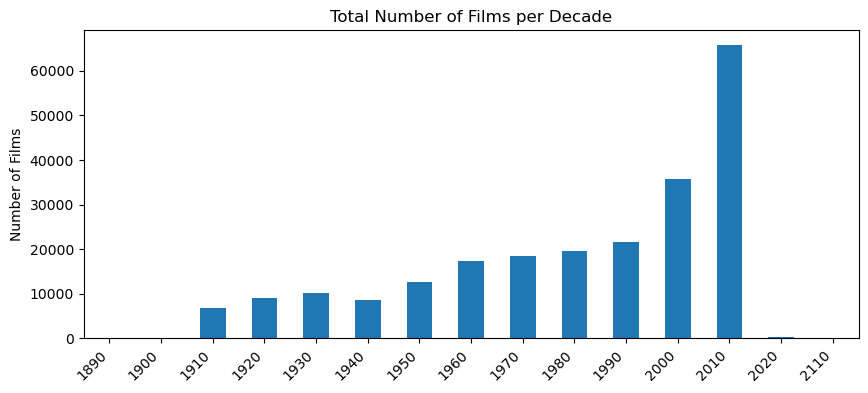

In [26]:
titles['decade'] = (titles['year'] // 10) * 10
total_films = (titles.groupby('decade')['title']
               .size().
               plot(kind='bar', 
                    xlabel='', 
                    ylabel='Number of Films', 
                    title='Total Number of Films per Decade', 
                    figsize=(10, 4)))
plt.xticks(rotation=45, ha='right')
plt.show()

### Use groupby() to plot the number of "Hamlet" films made each decade.

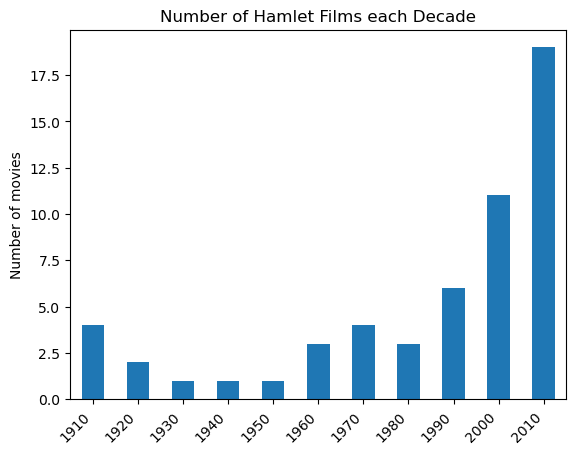

In [ ]:
hamlet_films = titles.loc[titles['title'].str.contains('hamlet', case=False, na=False)]
hamlet_decade = (hamlet_films.groupby('decade')['title']
                 .count()
                 .plot(kind='bar', 
                       xlabel='', 
                       ylabel='Number of movies', 
                       title='Number of Hamlet Films each Decade'))
plt.xticks(rotation=45, ha='right')
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

### Use groupby() to determine how many roles are listed for each movie named _The Pink Panther_.

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

### List each of the characters that Frank Oz has portrayed at least twice.